In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

# Classical logic gates with quantum circuits

We define functions which take one or two "binary strings" ('0' or '1') as input and return the result of the logical operation.

## The NOT gate

In [2]:
def NOT(inp):
    """A NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


░ ┌───┐ ░ ┌─┐
  q: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



NOT with input 1 gives output 0


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

## The XOR gate

An XOR operation is done with a controlled NOT quantum gate (cx): flip the target qubit if the control qubit is |1>.

In [4]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.cx(0,1) # Target qubit (1) flipped if control qubit (0) is 1
        
    # barrier between gate operation and measurement
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [5]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

XOR with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 0 1 gives output 1


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



XOR with inputs 1 0 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>───────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



XOR with inputs 1 1 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░ ┌─┴─┐ ░ ┌─┐
q_1: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

## The AND gate

An AND gate is realized with a Toffoli gate (ccx): target qubit flipped only if both control qubits are |1>.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    qc.ccx(0,1,2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [7]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

AND with inputs 0 0 gives output 0


░       ░    
q_0: ─|0>──░───■───░────
           ░   │   ░    
q_1: ─|0>──░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 0 1 gives output 0


░       ░    
q_0: ─|0>───────░───■───░────
          ┌───┐ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 0 gives output 0


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          └───┘ ░   │   ░    
q_1: ─|0>───────░───■───░────
                ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



AND with inputs 1 1 gives output 1


┌───┐ ░       ░    
q_0: ─|0>─┤ X ├─░───■───░────
          ├───┤ ░   │   ░    
q_1: ─|0>─┤ X ├─░───■───░────
          └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ───────────░─┤ X ├─░─┤M├
                ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

## The NAND gate

A NAND gate returns 0 only if both bits are 1. It is simply a combination of AND and NOT: NOT(AND(b1,b2)).

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [9]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

NAND with inputs 0 0 gives output 1


░            ░    
q_0: ─|0>──░───■────────░────
           ░   │        ░    
q_1: ─|0>──░───■────────░────
           ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0



NAND with inputs 0 1 gives output 1


░            ░    
q_0: ─|0>───────░───■────────░────
          ┌───┐ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



NAND with inputs 1 0 gives output 1


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░   │        ░    
q_1: ─|0>───────░───■────────░────
                ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



NAND with inputs 1 1 gives output 0


┌───┐ ░            ░    
q_0: ─|0>─┤ X ├─░───■────────░────
          ├───┤ ░   │        ░    
q_1: ─|0>─┤ X ├─░───■────────░────
          └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░─┤ X ├┤ X ├─░─┤M├
                ░ └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0

## The OR gate

Using de Morgan's laws, we can rewrite OR as a combination of AND and NOT: OR(b1,b2)=NOT(AND(NOT(b1),NOT(b2))).

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [11]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

OR with inputs 0 0 gives output 0


░ ┌───┐           ░    
q_0: ─|0>──░─┤ X ├──■────────░────
           ░ ├───┤  │        ░    
q_1: ─|0>──░─┤ X ├──■────────░────
           ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>──░──────┤ X ├┤ X ├─░─┤M├
           ░      └───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0



OR with inputs 0 1 gives output 1


░ ┌───┐           ░    
q_0: ─|0>───────░─┤ X ├──■────────░────
          ┌───┐ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 0 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ ├───┤  │        ░    
q_1: ─|0>───────░─┤ X ├──■────────░────
                ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0



OR with inputs 1 1 gives output 1


┌───┐ ░ ┌───┐           ░    
q_0: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          ├───┤ ░ ├───┤  │        ░    
q_1: ─|0>─┤ X ├─░─┤ X ├──■────────░────
          └───┘ ░ └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─|0>───────░──────┤ X ├┤ X ├─░─┤M├
                ░      └───┘└───┘ ░ └╥┘
c: 1/════════════════════════════════╩═
                                     0

# The AND gate on a quantum computer

In [12]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Get list of providers, for open accounts there is only one provider `ibm-q/open/main`:

In [13]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

Get list of available backends for this provider:

In [14]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Display information about a chosen backend:

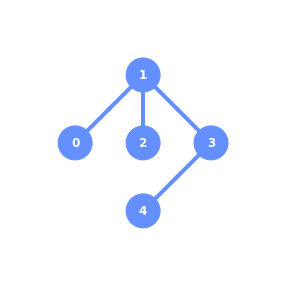

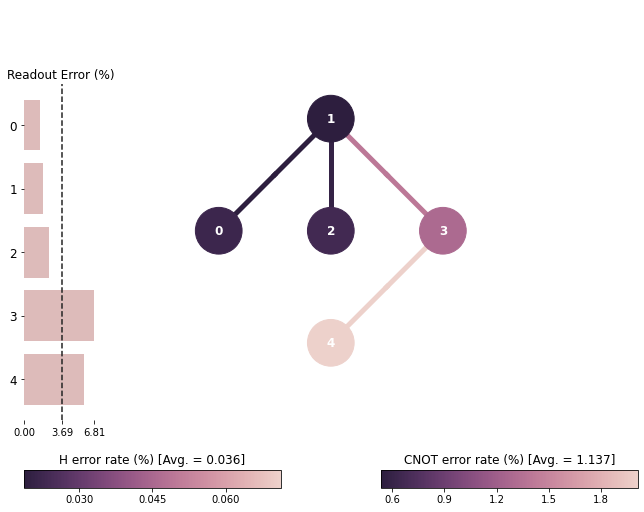

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

Get the least busy backend from a filtered list of backends:

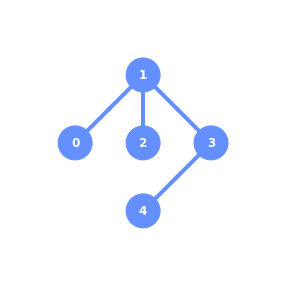

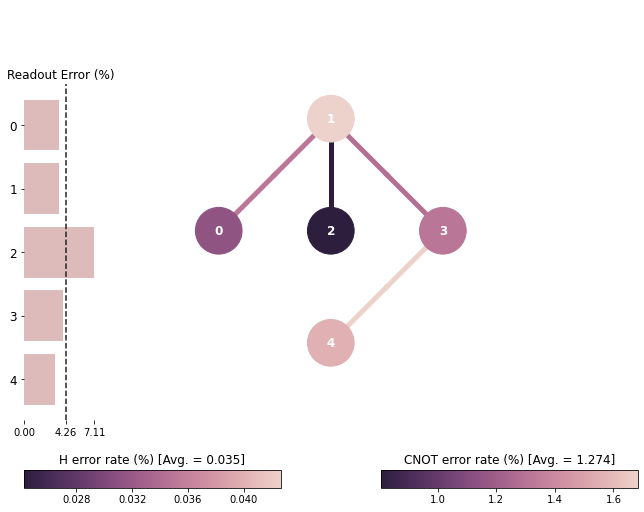

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

Show the decomposition of a Toffoli gate into single- and two-qubit gates (the only types of gates available on an IBM QC):

In [17]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the required connectivity


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [19]:
from qiskit.tools.monitor import job_monitor

Define the AND gate (8192 is the maximum number of shots for open IBM systems, if you change the number here you must change it below, too):

In [27]:
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=1024)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

Define a layout: mapping of virtual to physical qubits. See [transpiler documentation](https://qiskit.org/documentation/apidoc/transpiler.html).

In [28]:
layout = [1,3,4]

In [32]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/1024
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst, prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

6373877cad241473bb111659
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.89
---------------------------------
63738e58718d112d8e631eb8
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.83
---------------------------------
637396aae0f73077669bfbb3
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.89
---------------------------------
6373a03c754e46f2304cf4d5
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.77
---------------------------------


The highest of these probabilities was 0.89
The lowest of these probabilities was 0.77


In [33]:
print('Transpiled AND gate circuit with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw()

Transpiled AND gate circuit with input 0 0

The circuit depth : 21
# of nonlocal gates : 15
Probability of correct answer : 0.89


global phase: 5π/8
                                                                              »
ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
                ░                                              ┌───┐          »
      q_0 -> 1 ─░───────────────────────────────────────■──────┤ X ├──■───────»
                ░                                       │      └─┬─┘  │       »
ancilla_1 -> 2 ─────────────────────────────────────────┼────────┼────┼───────»
                ░                                     ┌─┴─┐      │  ┌─┴─┐     »
      q_1 -> 3 ─░───────────────────────────────■─────┤ X ├──────■──┤ X ├──■──»
                ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──┴───┴───┐     └───┘┌─┴─┐»
      q_2 -> 4 ─░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──────────┤ X ├»
                ░ └─────────┘└────┘└─────────┘└───┘└──────────┘          └───┘»
          c: 1/═══════════════════════════════════════════════════════════════»
                                                                              »
«                                                                         »
«ancilla_0 -> 0 ──────────────────────────────────────────────────────────»
«                  ┌───┐        ┌───┐                      ┌───┐          »
«      q_0 -> 1 ───┤ X ├─────■──┤ X ├───────────────────■──┤ X ├──■───────»
«                  └─┬─┘     │  └─┬─┘                   │  └─┬─┘  │       »
«ancilla_1 -> 2 ─────┼───────┼────┼─────────────────────┼────┼────┼───────»
«                    │     ┌─┴─┐  │       ┌─────────┐ ┌─┴─┐  │  ┌─┴─┐     »
«      q_1 -> 3 ─────■─────┤ X ├──■────■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├──■──»
«               ┌─────────┐└───┘     ┌─┴─┐├─────────┴┐└───┘     └───┘┌─┴─┐»
«      q_2 -> 4 ┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├»
«               └─────────┘          └───┘└──────────┘               └───┘»
«          c: 1/══════════════════════════════════════════════════════════»
«                                                                         »
«                                                   ░    
«ancilla_0 -> 0 ────────────────────────────────────░────
«                  ┌───┐    ┌──────────┐   ┌───┐    ░    
«      q_0 -> 1 ───┤ X ├────┤ Rz(-π/4) ├───┤ X ├────░────
«                  └─┬─┘    └──────────┘   └─┬─┘    ░    
«ancilla_1 -> 2 ─────┼───────────────────────┼──────░────
«                    │      ┌─────────┐      │      ░    
«      q_1 -> 3 ─────■──────┤ Rz(π/4) ├──────■──────░────
«               ┌──────────┐└──┬────┬─┘ ┌─────────┐ ░ ┌─┐
«      q_2 -> 4 ┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├─░─┤M├
«               └──────────┘   └────┘   └─────────┘ ░ └╥┘
«          c: 1/═══════════════════════════════════════╩═
«                                                      0

In [34]:
print('Transpiled AND gate circuit with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw()

Transpiled AND gate circuit with input 0 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.83


global phase: 5π/8
                                                                              »
ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
                     ░                                              ┌───┐     »
      q_0 -> 1 ──────░───────────────────────────────────────■──────┤ X ├──■──»
                     ░                                       │      └─┬─┘  │  »
ancilla_1 -> 2 ──────────────────────────────────────────────┼────────┼────┼──»
               ┌───┐ ░                                     ┌─┴─┐      │  ┌─┴─┐»
      q_1 -> 3 ┤ X ├─░───────────────────────────────■─────┤ X ├──────■──┤ X ├»
               └───┘ ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──┴───┴───┐     └───┘»
      q_2 -> 4 ──────░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──────────»
                     ░ └─────────┘└────┘└─────────┘└───┘└──────────┘          »
          c: 1/═══════════════════════════════════════════════════════════════»
                                                                              »
«                                                                              »
«ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
«                       ┌───┐        ┌───┐                      ┌───┐          »
«      q_0 -> 1 ────────┤ X ├─────■──┤ X ├───────────────────■──┤ X ├──■───────»
«                       └─┬─┘     │  └─┬─┘                   │  └─┬─┘  │       »
«ancilla_1 -> 2 ──────────┼───────┼────┼─────────────────────┼────┼────┼───────»
«                         │     ┌─┴─┐  │       ┌─────────┐ ┌─┴─┐  │  ┌─┴─┐     »
«      q_1 -> 3 ──■───────■─────┤ X ├──■────■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├──■──»
«               ┌─┴─┐┌─────────┐└───┘     ┌─┴─┐├─────────┴┐└───┘     └───┘┌─┴─┐»
«      q_2 -> 4 ┤ X ├┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├»
«               └───┘└─────────┘          └───┘└──────────┘               └───┘»
«          c: 1/═══════════════════════════════════════════════════════════════»
«                                                                              »
«                                                   ░    
«ancilla_0 -> 0 ────────────────────────────────────░────
«                  ┌───┐    ┌──────────┐   ┌───┐    ░    
«      q_0 -> 1 ───┤ X ├────┤ Rz(-π/4) ├───┤ X ├────░────
«                  └─┬─┘    └──────────┘   └─┬─┘    ░    
«ancilla_1 -> 2 ─────┼───────────────────────┼──────░────
«                    │      ┌─────────┐      │      ░    
«      q_1 -> 3 ─────■──────┤ Rz(π/4) ├──────■──────░────
«               ┌──────────┐└──┬────┬─┘ ┌─────────┐ ░ ┌─┐
«      q_2 -> 4 ┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├─░─┤M├
«               └──────────┘   └────┘   └─────────┘ ░ └╥┘
«          c: 1/═══════════════════════════════════════╩═
«                                                      0

In [35]:
print('Transpiled AND gate circuit with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw()

Transpiled AND gate circuit with input 1 0

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.89


global phase: 5π/8
                                                                              »
ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
               ┌───┐ ░                                              ┌───┐     »
      q_0 -> 1 ┤ X ├─░───────────────────────────────────────■──────┤ X ├──■──»
               └───┘ ░                                       │      └─┬─┘  │  »
ancilla_1 -> 2 ──────────────────────────────────────────────┼────────┼────┼──»
                     ░                                     ┌─┴─┐      │  ┌─┴─┐»
      q_1 -> 3 ──────░───────────────────────────────■─────┤ X ├──────■──┤ X ├»
                     ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──┴───┴───┐     └───┘»
      q_2 -> 4 ──────░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──────────»
                     ░ └─────────┘└────┘└─────────┘└───┘└──────────┘          »
          c: 1/═══════════════════════════════════════════════════════════════»
                                                                              »
«                                                                              »
«ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
«                       ┌───┐        ┌───┐                      ┌───┐          »
«      q_0 -> 1 ────────┤ X ├─────■──┤ X ├───────────────────■──┤ X ├──■───────»
«                       └─┬─┘     │  └─┬─┘                   │  └─┬─┘  │       »
«ancilla_1 -> 2 ──────────┼───────┼────┼─────────────────────┼────┼────┼───────»
«                         │     ┌─┴─┐  │       ┌─────────┐ ┌─┴─┐  │  ┌─┴─┐     »
«      q_1 -> 3 ──■───────■─────┤ X ├──■────■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├──■──»
«               ┌─┴─┐┌─────────┐└───┘     ┌─┴─┐├─────────┴┐└───┘     └───┘┌─┴─┐»
«      q_2 -> 4 ┤ X ├┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├»
«               └───┘└─────────┘          └───┘└──────────┘               └───┘»
«          c: 1/═══════════════════════════════════════════════════════════════»
«                                                                              »
«                                                   ░    
«ancilla_0 -> 0 ────────────────────────────────────░────
«                  ┌───┐    ┌──────────┐   ┌───┐    ░    
«      q_0 -> 1 ───┤ X ├────┤ Rz(-π/4) ├───┤ X ├────░────
«                  └─┬─┘    └──────────┘   └─┬─┘    ░    
«ancilla_1 -> 2 ─────┼───────────────────────┼──────░────
«                    │      ┌─────────┐      │      ░    
«      q_1 -> 3 ─────■──────┤ Rz(π/4) ├──────■──────░────
«               ┌──────────┐└──┬────┬─┘ ┌─────────┐ ░ ┌─┐
«      q_2 -> 4 ┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├─░─┤M├
«               └──────────┘   └────┘   └─────────┘ ░ └╥┘
«          c: 1/═══════════════════════════════════════╩═
«                                                      0

In [36]:
print('Transpiled AND gate circuit with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw()

Transpiled AND gate circuit with input 1 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.77


global phase: 5π/8
                                                                              »
ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
               ┌───┐ ░                                              ┌───┐     »
      q_0 -> 1 ┤ X ├─░───────────────────────────────────────■──────┤ X ├──■──»
               └───┘ ░                                       │      └─┬─┘  │  »
ancilla_1 -> 2 ──────────────────────────────────────────────┼────────┼────┼──»
               ┌───┐ ░                                     ┌─┴─┐      │  ┌─┴─┐»
      q_1 -> 3 ┤ X ├─░───────────────────────────────■─────┤ X ├──────■──┤ X ├»
               └───┘ ░ ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──┴───┴───┐     └───┘»
      q_2 -> 4 ──────░─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──────────»
                     ░ └─────────┘└────┘└─────────┘└───┘└──────────┘          »
          c: 1/═══════════════════════════════════════════════════════════════»
                                                                              »
«                                                                              »
«ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
«                       ┌───┐        ┌───┐                      ┌───┐          »
«      q_0 -> 1 ────────┤ X ├─────■──┤ X ├───────────────────■──┤ X ├──■───────»
«                       └─┬─┘     │  └─┬─┘                   │  └─┬─┘  │       »
«ancilla_1 -> 2 ──────────┼───────┼────┼─────────────────────┼────┼────┼───────»
«                         │     ┌─┴─┐  │       ┌─────────┐ ┌─┴─┐  │  ┌─┴─┐     »
«      q_1 -> 3 ──■───────■─────┤ X ├──■────■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├──■──»
«               ┌─┴─┐┌─────────┐└───┘     ┌─┴─┐├─────────┴┐└───┘     └───┘┌─┴─┐»
«      q_2 -> 4 ┤ X ├┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├»
«               └───┘└─────────┘          └───┘└──────────┘               └───┘»
«          c: 1/═══════════════════════════════════════════════════════════════»
«                                                                              »
«                                                   ░    
«ancilla_0 -> 0 ────────────────────────────────────░────
«                  ┌───┐    ┌──────────┐   ┌───┐    ░    
«      q_0 -> 1 ───┤ X ├────┤ Rz(-π/4) ├───┤ X ├────░────
«                  └─┬─┘    └──────────┘   └─┬─┘    ░    
«ancilla_1 -> 2 ─────┼───────────────────────┼──────░────
«                    │      ┌─────────┐      │      ░    
«      q_1 -> 3 ─────■──────┤ Rz(π/4) ├──────■──────░────
«               ┌──────────┐└──┬────┬─┘ ┌─────────┐ ░ ┌─┐
«      q_2 -> 4 ┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├─░─┤M├
«               └──────────┘   └────┘   └─────────┘ ░ └╥┘
«          c: 1/═══════════════════════════════════════╩═
«                                                      0